In [60]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
import json

In [61]:
from bs4 import BeautifulSoup
import requests
import csv

In [4]:
t=requests.get("http://www.the-numbers.com/movie/records/All-Time-Domestic-Box-Office")

In [5]:
soup = BeautifulSoup(t.text)

/usr/local/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 170 of the file /usr/local/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [6]:
allrows=soup.find_all('tr')

In [7]:
dictn = {'ryear':[], 'title':[], 'DBO':[], 'IBO':[], 'WWBO':[]}
for arow in allrows[1:1+101-1]:
    tds = arow.find_all('td')
    rank = int(tds[0].text)
    year = int(tds[1].text)
    title = tds[2].text
    DBO = int(tds[3].text.strip('$').replace(',',''))
    IBO = int(tds[4].text.strip('$').replace(',',''))
    WWBO = int(tds[5].text.strip('$').replace(',',''))
    
    dictn['DBO'].append(DBO)
    dictn['IBO'].append(IBO)
    dictn['WWBO'].append(WWBO)
    dictn['ryear'].append(year)
    dictn['title'].append(title)
                    

In [45]:
df=pd.DataFrame(dictn)

In [44]:
df.sort(['ryear', 'title', 'DBO', 'IBO', 'adj_DBO'], ascending = False)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,DBO,IBO,WWBO,ryear,title,adj_DBO
39,341268248,680500000,1021768248,2016,Zootopia,3.475071e+08
31,366219765,498443554,864663319,2016,The Secret Life of Pets,3.729148e+08
32,364001123,599900000,963901123,2016,The Jungle Book,3.706556e+08
47,324333962,419600000,743933962,2016,Suicide Squad,3.302632e+08
6,485516370,532200000,1017716370,2016,Finding Dory,4.943923e+08
33,363070709,420700000,783770709,2016,Deadpool,3.697081e+08
18,408084349,743600000,1151684349,2016,Captain America: Civil War,4.155447e+08
45,330360194,537800000,868160194,2016,Batman v Superman: Dawn of Justice,3.363996e+08
77,281723902,368799525,650523427,2015,The Hunger Games: Mockingjay - Part 2,2.889670e+08
0,936662225,1122000000,2058662225,2015,Star Wars Ep. VII: The Force Awakens,9.607437e+08


In [ ]:
def wrapper (the_row):
    return get_adjusted_price(the_row.year, the_row.domestic)
df.apply(foo, axis=1)



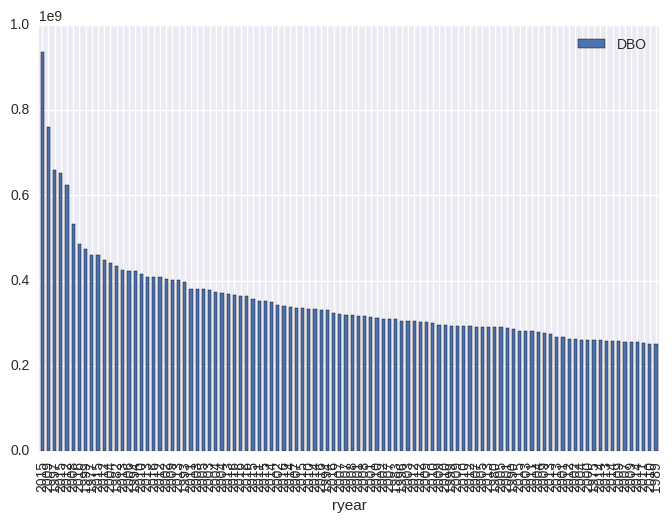

In [13]:
df.plot(x = "ryear", y = "DBO", kind = "bar")


In [41]:
df.to_csv('boxoffice.csv')

In [39]:
r= requests.get("https://www.statbureau.org/get-data-json?country=united-states")

In [43]:
r

<Response [200]>

In [18]:
r.json()

[{'Country': 0,
  'InflationRate': 0.24039958646288753,
  'InflationRateFormatted': '0.24',
  'InflationRateRounded': 0.24,
  'Month': '/Date(1472702400000)/',
  'MonthFormatted': '2016-09-01'},
 {'Country': 0,
  'InflationRate': 0.09184301078843693,
  'InflationRateFormatted': '0.09',
  'InflationRateRounded': 0.09,
  'Month': '/Date(1470024000000)/',
  'MonthFormatted': '2016-08-01'},
 {'Country': 0,
  'InflationRate': -0.16181364047498528,
  'InflationRateFormatted': '-0.16',
  'InflationRateRounded': -0.16,
  'Month': '/Date(1467345600000)/',
  'MonthFormatted': '2016-07-01'},
 {'Country': 0,
  'InflationRate': 0.3284366167282052,
  'InflationRateFormatted': '0.33',
  'InflationRateRounded': 0.33,
  'Month': '/Date(1464753600000)/',
  'MonthFormatted': '2016-06-01'},
 {'Country': 0,
  'InflationRate': 0.4045790998115029,
  'InflationRateFormatted': '0.40',
  'InflationRateRounded': 0.4,
  'Month': '/Date(1462075200000)/',
  'MonthFormatted': '2016-05-01'},
 {'Country': 0,
  'Inflat

In [117]:
dir(r)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [20]:
inflation = json.loads(r.text)

In [21]:
inflation[-1]

{'Country': 0,
 'InflationRate': 0,
 'InflationRateFormatted': '0.00',
 'InflationRateRounded': 0,
 'Month': '/Date(-1796065200000)/',
 'MonthFormatted': '1913-02-01'}

In [22]:
adjusted = requests.get("https://www.statbureau.org/calculate-inflation-price-json?country=united-states&start=1954/1/1&end=2016/8/1&amount=0.32")

In [23]:
adjusted

<Response [200]>

In [25]:
adjusted.status_code

200

In [26]:
type(adjusted.json())

str

In [27]:
def get_adjusted_price(year, price):
    req_url = "https://www.statbureau.org/calculate-inflation-price-json?country=united-states&start={}/1/1&end=2016/8/1&amount={}"
    resp = requests.get(req_url.format(year,price))
    if resp.status_code == 200:
        adj_price = float(resp.json().replace('$','').replace(',','').replace(' ',''))
    else:
        adj_price = math.nan
    return adj_price

print(get_adjusted_price(1990,1.00))

1.91


In [28]:
def wrapper(the_row):
    return get_adjusted_price(the_row.ryear, the_row.DBO)

df['adj_DBO'] = df.apply(wrapper, axis=1)

In [29]:

df.head()

,DBO,IBO,WWBO,ryear,title,adj_DBO
0,936662225,1122000000,2058662225,2015,Star Wars Ep. VII: The Force Awakens,9.607437e+08
1,760507625,2023411357,2783918982,2009,Avatar,8.712802e+08
2,658672302,1548943366,2207615668,1997,Titanic,1.000256e+09
3,652198010,1018130015,1670328025,2015,Jurassic World,6.689660e+08
4,623279547,896200000,1519479547,2012,The Avengers,6.651966e+08


In [30]:
df.sort(['ryear', 'title', 'DBO', 'IBO', 'adj_DBO'], ascending = False)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,DBO,IBO,WWBO,ryear,title,adj_DBO
39,341268248,680500000,1021768248,2016,Zootopia,3.475071e+08
31,366219765,498443554,864663319,2016,The Secret Life of Pets,3.729148e+08
32,364001123,599900000,963901123,2016,The Jungle Book,3.706556e+08
47,324333962,419600000,743933962,2016,Suicide Squad,3.302632e+08
6,485516370,532200000,1017716370,2016,Finding Dory,4.943923e+08
33,363070709,420700000,783770709,2016,Deadpool,3.697081e+08
18,408084349,743600000,1151684349,2016,Captain America: Civil War,4.155447e+08
45,330360194,537800000,868160194,2016,Batman v Superman: Dawn of Justice,3.363996e+08
77,281723902,368799525,650523427,2015,The Hunger Games: Mockingjay - Part 2,2.889670e+08
0,936662225,1122000000,2058662225,2015,Star Wars Ep. VII: The Force Awakens,9.607437e+08


In [392]:
Moreinfosaboutmovies=df1.append([df3, df2, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14]).dropna(axis=1, how='all')
Moreinfosaboutmovies.rename(columns=lambda x: x.strip())

,Movie,Actors,Awards,Director,Genre
0,Zootopia,"Louis C.K., Eric Stonestreet, Kevin Hart, Jenn...",N/A,"Yarrow Cheney, Chris Renaud","Animation, Adventure, Comedy"
0,Avator,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Won 3 Oscars. Another 80 wins & 121 nominations.,James Cameron,"Action, Adventure, Fantasy"
0,The Secret Life of Pets,"Louis C.K., Eric Stonestreet, Kevin Hart, Jenn...",N/A,"Yarrow Cheney, Chris Renaud","Animation, Adventure, Comedy"
0,Titanic,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",Won 11 Oscars. Another 110 wins & 73 nominations.,James Cameron,"Drama, Romance"
0,The Lion King,"Matthew Broderick, Jonathan Taylor Thomas, Jam...",Won 2 Oscars. Another 32 wins & 30 nominations.,"Roger Allers, Rob Minkoff","Animation, Adventure, Drama"
0,Jurassic World,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",6 wins & 53 nominations.,Colin Trevorrow,"Action, Adventure, Sci-Fi"
0,The Avengers,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Nominated for 1 Oscar. Another 34 wins & 75 no...,Joss Whedon,"Action, Sci-Fi, Thriller"
0,The Jungle Book,"Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",3 nominations.,Jon Favreau,"Adventure, Drama, Family"
0,Suicide Squad,"Will Smith, Jaime FitzSimons, Ike Barinholtz, ...",2 wins & 3 nominations.,David Ayer,"Action, Adventure, Fantasy"
0,Finding Dory,"Ellen DeGeneres, Albert Brooks, Ed O'Neill, Ka...",2 wins.,"Andrew Stanton, Angus MacLane","Animation, Adventure, Comedy"


In [111]:
r= requests.get("http://www.omdbapi.com/?t=Zootopia&y=&plot=short")

In [314]:
zinfo=json.loads(r.text)

In [316]:
Zootopiamoreinfo =  {"Actors":[],"Director":[], "Genre":[], "Awards":[]}

In [317]:
for info in zinfo:
    act = zinfo["Actors"]
    dirc =zinfo["Director"]
    awrd =zinfo["Awards"]
    gnr = zinfo["Genre"]
Zootopiamoreinfo["Actors"].append(act)
Zootopiamoreinfo["Director"].append(dirc)
Zootopiamoreinfo["Genre"].append(gnr)
Zootopiamoreinfo["Awards"].append(awrd)

In [328]:
df1=pd.DataFrame(Zootopiamoreinfo)

In [ ]:


idx =0
df1.insert(idx, 'Movie', value='Zootopia')

In [335]:
df1

,Movie,Actors,Awards,Director,Genre
0,Zootopia,"Louis C.K., Eric Stonestreet, Kevin Hart, Jenn...",N/A,"Yarrow Cheney, Chris Renaud","Animation, Adventure, Comedy"


In [121]:
slp= requests.get("http://www.omdbapi.com/?t=The Secret Life of Pets&y=&plot=short")

In [122]:
slpd=json.loads(slp.text)

In [310]:
TheSecretLifeofPets =   {"Actors":[],"Director":[], "Genre":[], "Awards":[]}

In [311]:
for info in slpd:
    act = slpd["Actors"]
    dirc =slpd["Director"]
    awrd =slpd["Awards"]
    gnr = slpd["Genre"]
TheSecretLifeofPets["Actors"].append(act)
TheSecretLifeofPets["Director"].append(dirc)
TheSecretLifeofPets["Genre"].append(gnr)
TheSecretLifeofPets["Awards"].append(awrd)

In [339]:
df2=pd.DataFrame(TheSecretLifeofPets)

idx =0
df2.insert(idx, 'Movie', value='The Secret Life of Pets')
df2

,Movie,Actors,Awards,Director,Genre
0,The Secret Life of Pets,"Louis C.K., Eric Stonestreet, Kevin Hart, Jenn...",N/A,"Yarrow Cheney, Chris Renaud","Animation, Adventure, Comedy"


In [134]:
av= requests.get("http://www.omdbapi.com/?t=Avatar&y=&plot=short")

In [135]:
avatinfo = json.loads(av.text)

In [306]:
Avatarmoreinfo =  {"Actors":[],"Director":[], "Genre":[], "Awards":[]}

In [307]:
for info in avatinfo:
    act = avatinfo["Actors"]
    dirc =avatinfo["Director"]
    awrd =avatinfo["Awards"]
    gnr = avatinfo["Genre"]
Avatarmoreinfo["Actors"].append(act)
Avatarmoreinfo["Director"].append(dirc)
Avatarmoreinfo["Genre"].append(gnr)
Avatarmoreinfo["Awards"].append(awrd)

In [342]:
df3=pd.DataFrame(Avatarmoreinfo)

idx =0
df3.insert(idx, 'Movie', value='Avator')
df3

,Movie,Actors,Awards,Director,Genre
0,Avator,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Won 3 Oscars. Another 80 wins & 121 nominations.,James Cameron,"Action, Adventure, Fantasy"


In [100]:
movieinfo['Actors']

'Ginnifer Goodwin, Jason Bateman, Idris Elba, Jenny Slate'

In [142]:
tit= requests.get("http://www.omdbapi.com/?t=Titanic&y=&plot=short")

In [301]:
titdata = json.loads(tit.text)

In [300]:
Titanicmoreinfo = {"Actors":[],"Director":[], "Genre":[], "Awards":[]}

In [302]:
for info in titdata:
    act = titdata["Actors"]
    dirc =titdata["Director"]
    awrd =titdata["Awards"]
    gnr = titdata["Genre"]
Titanicmoreinfo["Actors"].append(act)
Titanicmoreinfo["Director"].append(dirc)
Titanicmoreinfo["Genre"].append(gnr)
Titanicmoreinfo["Awards"].append(awrd)

In [345]:
df4=pd.DataFrame(Titanicmoreinfo)

idx =0
df4.insert(idx, 'Movie', value='Titanic')
df4

,Movie,Actors,Awards,Director,Genre
0,Titanic,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",Won 11 Oscars. Another 110 wins & 73 nominations.,James Cameron,"Drama, Romance"


In [168]:
Thelionking= requests.get("http://www.omdbapi.com/?t={The Lion King}&y=&plot=short")

In [295]:
lkg=json.loads(Thelionking.text)

In [296]:
TheLionKingmoreinfo = {"Actors":[],"Director":[], "Genre":[], "Awards":[]}

In [297]:
for info in lkg:
    act = lkg["Actors"]
    dirc = lkg["Director"]
    awrd = lkg["Awards"]
    gnr = lkg["Genre"]
TheLionKingmoreinfo["Actors"].append(act)
TheLionKingmoreinfo["Director"].append(dirc)
TheLionKingmoreinfo["Genre"].append(gnr)
TheLionKingmoreinfo["Awards"].append(awrd)

In [348]:
df5=pd.DataFrame(TheLionKingmoreinfo)
idx =0
df5.insert(idx, 'Movie', value='The Lion King')
df5

,Movie,Actors,Awards,Director,Genre
0,The Lion King,"Matthew Broderick, Jonathan Taylor Thomas, Jam...",Won 2 Oscars. Another 32 wins & 30 nominations.,"Roger Allers, Rob Minkoff","Animation, Adventure, Drama"


In [172]:
jurassicworld=requests.get("http://www.omdbapi.com/?t={Jurassic World}&y=&plot=short")

In [286]:
jw=json.loads(jurassicworld.text)

In [292]:
JurassicWorldmoreinfo = {"Actors":[],"Director":[], "Genre":[], "Awards":[]}

In [293]:
for info in jw:
    act = jw["Actors"]
    dirc = jw["Director"]
    awrd = jw["Awards"]
    gnr = jw["Genre"]
JurassicWorldmoreinfo["Actors"].append(act)
JurassicWorldmoreinfo["Director"].append(dirc)
JurassicWorldmoreinfo["Genre"].append(gnr)
JurassicWorldmoreinfo["Awards"].append(awrd)

In [351]:
df6=pd.DataFrame(JurassicWorldmoreinfo)

idx =0
df6.insert(idx, 'Movie', value='Jurassic World')
df6

,Movie,Actors,Awards,Director,Genre
0,Jurassic World,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",6 wins & 53 nominations.,Colin Trevorrow,"Action, Adventure, Sci-Fi"


In [174]:
Theavengers=requests.get("http://www.omdbapi.com/?t={The Avengers}&y=&plot=short")

In [283]:
Avng = json.loads(Theavengers.text)

In [282]:
Theavengersmoreinfo = {"Actors":[],"Director":[], "Genre":[], "Awards":[]}

In [284]:
for info in Avng:
    act = Avng["Actors"]
    dirc = Avng["Director"]
    awrd = Avng["Awards"]
    gnr = Avng["Genre"]
Theavengersmoreinfo["Actors"].append(act)
Theavengersmoreinfo["Director"].append(dirc)
Theavengersmoreinfo["Genre"].append(gnr)
Theavengersmoreinfo["Awards"].append(awrd)

In [353]:
df7=pd.DataFrame(Theavengersmoreinfo)

idx =0
df7.insert(idx, 'Movie', value='The Avengers')
df7

,Movie,Actors,Awards,Director,Genre
0,The Avengers,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Nominated for 1 Oscar. Another 34 wins & 75 no...,Joss Whedon,"Action, Sci-Fi, Thriller"


In [267]:
TheJungleBook=requests.get("http://www.omdbapi.com/?t={The Jungle Book}&y=&plot=short")

In [268]:
jb = json.loads(TheJungleBook.text)

In [277]:
TheJungleBookmoreinfo= {"Actors":[],"Director":[], "Genre":[], "Awards":[]}

In [278]:
for info in jb:
    act = jb["Actors"]
    dirc = jb["Director"]
    awrd = jb["Awards"]
    gnr = jb["Genre"]
TheJungleBookmoreinfo["Actors"].append(act)
TheJungleBookmoreinfo["Director"].append(dirc)
TheJungleBookmoreinfo["Genre"].append(gnr)
TheJungleBookmoreinfo["Awards"].append(awrd)

In [355]:
df8=pd.DataFrame(TheJungleBookmoreinfo)

idx =0
df8.insert(idx, 'Movie', value='The Jungle Book')
df8

,Movie,Actors,Awards,Director,Genre
0,The Jungle Book,"Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",3 nominations.,Jon Favreau,"Adventure, Drama, Family"


In [238]:
SuicideSquad=requests.get("http://www.omdbapi.com/?t={Suicide Squad}&y=&plot=short")

In [247]:
ss = json.loads(SuicideSquad.text)

In [274]:
SuicideSquadinfo =  {"Actors":[], "Genre":[], "Awards":[]}

In [275]:
for info in ss:
    act = ss["Actors"]
    awrd = ss["Awards"]
    gnr = ss["Genre"]
SuicideSquadinfo["Actors"].append(act)
SuicidSquadinfo["Director"].append(dirc)
SuicideSquadinfo["Genre"].append(gnr)
SuicideSquadinfo["Awards"].append(awrd)

In [358]:
#No info for a director
df9=pd.DataFrame(SuicideSquadinfo)

idx =0
df9.insert(idx, 'Movie', value='Suicide Squad')
idx=3
df9.insert(idx, 'Director', value='David Ayer')
df9

,Movie,Actors,Awards,Director,Genre
0,Suicide Squad,"Will Smith, Jaime FitzSimons, Ike Barinholtz, ...",2 wins & 3 nominations.,David Ayer,"Action, Adventure, Fantasy"


In [233]:
fd=requests.get("http://www.omdbapi.com/?t={Finding Dory}&y=&plot=short")

In [234]:
Findingdorydata = json.loads(fd.text)

In [235]:
FindingDory = {"Actors":[], "Director":[], "Genre":[], "Awards":[]}

In [236]:
for info in Findingdorydata:
    act = Findingdorydata["Actors"]
    dirc = Findingdorydata["Director"]
    awrd = Findingdorydata["Awards"]
    gnr = Findingdorydata["Genre"]
FindingDory["Actors"].append(act)
FindingDory["Director"].append(dirc)
FindingDory["Genre"].append(gnr)
FindingDory["Awards"].append(awrd)

In [360]:
df10=pd.DataFrame(FindingDory)

idx =0
df10.insert(idx, 'Movie', value='Finding Dory')
df10

,Movie,Actors,Awards,Director,Genre
0,Finding Dory,"Ellen DeGeneres, Albert Brooks, Ed O'Neill, Ka...",2 wins.,"Andrew Stanton, Angus MacLane","Animation, Adventure, Comedy"


In [223]:
deadpooldata=requests.get("http://www.omdbapi.com/?t={Deadpool}&y=&plot=short")

In [226]:
ddata = json.loads(deadpooldata.text)

In [256]:
deadpool = {"Actors":[], "Director":[], "Genre":[], "Awards":[]}

In [257]:
for info in ddata:
    act = ddata["Actors"]
    dirc = ddata["Director"]
    awrd = ddata["Awards"]
    gnr = ddata["Genre"]
deadpool["Actors"].append(act)
deadpool["Director"].append(dirc)
deadpool["Genre"].append(gnr)
deadpool["Awards"].append(awrd)

In [367]:
df11=pd.DataFrame(deadpool)
idx=0
df11.insert(idx, 'Movie', 'Deadpool')
df11

,Movie,Actors,Awards,Director,Genre
0,Deadpool,"Ryan Reynolds, Karan Soni, Ed Skrein, Michael ...",4 wins & 11 nominations.,Tim Miller,"Action, Adventure, Comedy"


In [217]:
capt = requests.get("http://www.omdbapi.com/?t={Captain America: Civil War}&y=&plot=short")

In [216]:
captdata = json.loads(capt.text)

In [218]:
CaptainAmerica = {"Actors":[], "Director":[], "Genre":[], "Awards":[]}

In [219]:
for info in captdata:
    act = captdata["Actors"]
    dirc = captdata["Director"]
    awrd = captdata["Awards"]
    gnr = captdata["Genre"]
CaptainAmerica["Actors"].append(act)
CaptainAmerica["Director"].append(dirc)
CaptainAmerica["Genre"].append(gnr)
CaptainAmerica["Awards"].append(awrd)

In [365]:
df12=pd.DataFrame(CaptainAmerica)
idx = 0
df12.insert(idx, 'Movie', 'Captain America: Civil War')
df12

,Movie,Actors,Awards,Director,Genre
0,Captain America: Civil War,"Chris Evans, Robert Downey Jr., Scarlett Johan...",2 wins & 7 nominations.,"Anthony Russo, Joe Russo","Action, Adventure, Sci-Fi"


In [206]:
Bs =requests.get("http://www.omdbapi.com/?t={Batman v Superman: Dawn of Justice}&y=&plot=short")

In [209]:
data = json.loads(Bs.text)

In [212]:
BatmanSuperman = {"Actors":[], "Director":[], "Genre":[], "Awards":[]}

In [213]:
for info in data:
    act = data["Actors"]
    dirc = data["Director"]
    awrd = data["Awards"]
    gnr = data["Genre"]
BatmanSuperman["Actors"].append(act)
BatmanSuperman["Director"].append(dirc)
BatmanSuperman["Genre"].append(gnr)
BatmanSuperman["Awards"].append(awrd)

In [364]:
df13=pd.DataFrame(BatmanSuperman)
idx = 0
df13.insert(idx, 'Movie', 'Batman v Superman: Dawn of Justice')
df13

,Movie,Actors,Awards,Director,Genre
0,Batman v Superman: Dawn of Justice,"Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei...",1 win & 7 nominations.,Zack Snyder,"Action, Adventure, Sci-Fi"


In [178]:
Hungergames=requests.get("http://www.omdbapi.com/?t={The Hunger Games: Mockingjay - Part 2}&y=&plot=short")

In [185]:
hdata=json.loads(Hungergames.text)

In [190]:
Hungergamesinfo = {"Actors":[], "Director":[], "Genre":[], "Awards":[]}

In [193]:
for info in hdata:
    act = hdata["Actors"]
    dirc = hdata["Director"]
    awrd = hdata["Awards"]
    gnr = hdata["Genre"]
Hungergamesinfo["Actors"].append(act)
Hungergamesinfo["Director"].append(dirc)
Hungergamesinfo["Genre"].append(gnr)
Hungergamesinfo["Awards"].append(awrd)

In [362]:
df14=pd.DataFrame(Hungergamesinfo).head(1)

idx =0
df14.insert(idx, 'Movie', value='The Hunger Games: Mockingjay - Part 2')
df14

,Movie,Actors,Awards,Director,Genre
0,The Hunger Games: Mockingjay - Part 2,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",17 wins & 28 nominations.,Francis Lawrence,"Sci-Fi, Thriller, War"
